<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [ ]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [3]:
import requests
import pandas as pd
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

try:
    resp1 = requests.get(URL1)
    resp1.raise_for_status() # Raise an exception for HTTP errors (4xx or 5xx)

    # Access the content as bytes directly
    text1 = io.BytesIO(resp1.content)

    data = pd.read_csv(text1)
    #print(data.head(5))

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [5]:
import requests
import pandas as pd
import io

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

try:
    resp2 = requests.get(URL2)
    resp2.raise_for_status() # Raise an exception for HTTP errors (4xx or 5xx)

    # Access the content as bytes directly
    text2 = io.BytesIO(resp2.content)

    X = pd.read_csv(text2)
    #print(data.head(5))

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
y = data['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

we can see we only have 18 test samples.


In [10]:
y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['liblinear', 'sag', 'saga' , 'newton-cg', 'lbfgs']}

In [12]:
lr=LogisticRegression(random_state=42, max_iter=1000)


In [13]:
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10,             # Cross-validation splits
    scoring='accuracy', # Standard evaluation metric
    verbose=1,         # Output progress
    n_jobs=-1          # Use all available CPU cores
)

In [14]:
print("Fitting GridSearchCV...")
logreg_cv.fit(X_train, y_train)
print("GridSearchCV completed successfully.")

Fitting GridSearchCV...
Fitting 10 folds for each of 15 candidates, totalling 150 fits
GridSearchCV completed successfully.


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("\nGridSearchCV completed successfully.")
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)


GridSearchCV completed successfully.
tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
accuracy : 0.8625


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
# Calculate the accuracy on the test data
test_accuracy = logreg_cv.score(X_test, y_test)

print(f"Accuracy on the test data: {test_accuracy:.4f}")

Accuracy on the test data: 0.7778


Lets look at the confusion matrix:


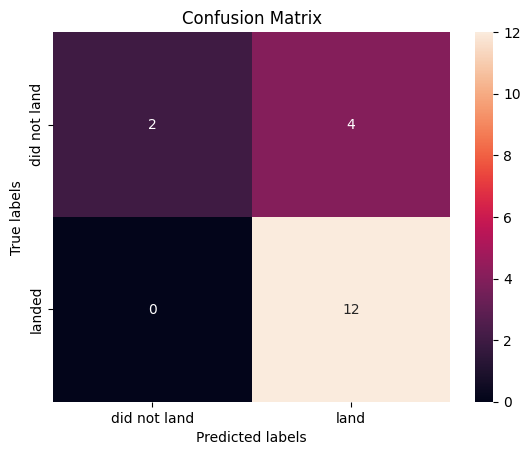

In [18]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [19]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(random_state=42)

In [20]:
# Create a GridSearchCV object for SVM
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,                 # Nombre de plis pour la validation croisée
    scoring='accuracy',    # Métrica d'évaluation (vous pouvez changer si besoin)
    verbose=2,             # Affiche plus de détails sur le processus d'ajustement
    n_jobs=-1              # Utilise tous les cœurs de CPU disponibles pour accélérer le processus
)

In [21]:
# Fit the GridSearchCV object to find the best parameters
print("Fitting GridSearchCV for SVM...")
svm_cv.fit(X_train, y_train)
print("GridSearchCV for SVM completed successfully.")

Fitting GridSearchCV for SVM...
Fitting 10 folds for each of 125 candidates, totalling 1250 fits
GridSearchCV for SVM completed successfully.


In [23]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.85


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
# Calculate the accuracy on the test data
test_accuracy = svm_cv.score(X_test, y_test)

print(f"Accuracy on the test data: {test_accuracy:.4f}")

Accuracy on the test data: 0.8333


We can plot the confusion matrix


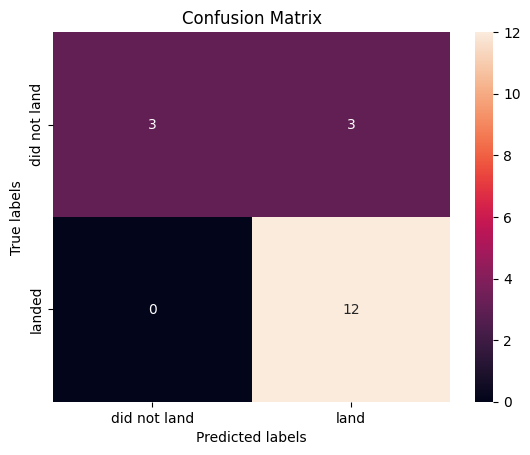

In [26]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [37]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto','sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state=42)

In [38]:
# Create a GridSearchCV object for Decision Tree Classifier
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,                 # Nombre de plis pour la validation croisée
    scoring='accuracy',    # Métrica d'évaluation (vous pouvez changer si besoin)
    verbose=2,             # Affiche plus de détails sur le processus d'ajustement
    n_jobs=-1              # Utilise tous les cœurs de CPU disponibles pour accélérer le processus
)

In [ ]:
# Fit the GridSearchCV object to find the best parameters
print("Fitting GridSearchCV for Decision Tree Classifier...")
tree_cv.fit(X_train, y_train)
print("GridSearchCV for Decision Tree Classifier completed successfully.")

In [40]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8892857142857142


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [41]:
# Calculate the accuracy on the test data
test_accuracy = tree_cv.score(X_test, y_test)

print(f"Accuracy on the test data: {test_accuracy:.4f}")

Accuracy on the test data: 0.8333


We can plot the confusion matrix


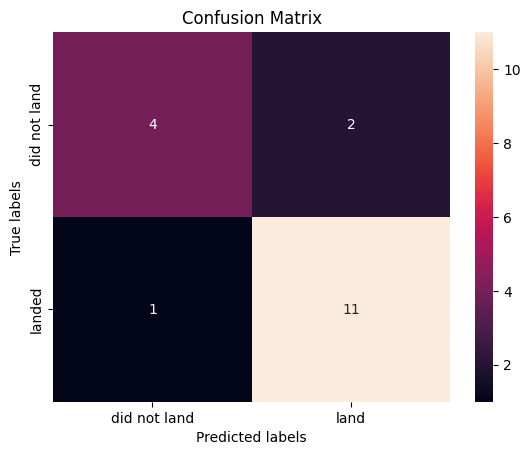

In [43]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [51]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [52]:
# Create a GridSearchCV object for SVM
knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10,                 # Nombre de plis pour la validation croisée
    scoring='accuracy',    # Métrica d'évaluation (vous pouvez changer si besoin)
    verbose=2,             # Affiche plus de détails sur le processus d'ajustement
    n_jobs=-1              # Utilise tous les cœurs de CPU disponibles pour accélérer le processus
)

In [53]:
# Fit the GridSearchCV object to find the best parameters
print("Fitting GridSearchCV for Decision Tree Classifier...")
knn_cv.fit(X_train, y_train)
print("GridSearchCV for Decision Tree Classifier completed successfully.")

Fitting GridSearchCV for Decision Tree Classifier...
Fitting 10 folds for each of 80 candidates, totalling 800 fits
GridSearchCV for Decision Tree Classifier completed successfully.


In [54]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.8785714285714287


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [55]:
# Calculate the accuracy on the test data
test_accuracy = knn_cv.score(X_test, y_test)

print(f"Accuracy on the test data: {test_accuracy:.4f}")

Accuracy on the test data: 0.7778


We can plot the confusion matrix


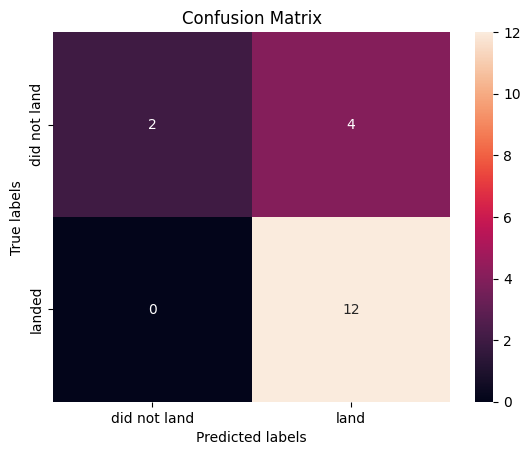

In [56]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  12


Find the method performs best:


In [57]:
results = {}

# Après entraînement de logreg_cv
results['Logistic Regression'] = {
    'Train_Accuracy': logreg_cv.best_score_,
    'Test_Accuracy': logreg_cv.score(X_test, y_test),
    'Best_Params': logreg_cv.best_params_
}

# Après entraînement de svm_cv
results['SVM'] = {
    'Train_Accuracy': svm_cv.best_score_,
    'Test_Accuracy': svm_cv.score(X_test, y_test),
    'Best_Params': svm_cv.best_params_
}

# Après entraînement de tree_cv
results['Decision Tree'] = {
    'Train_Accuracy': tree_cv.best_score_,
    'Test_Accuracy': tree_cv.score(X_test, y_test),
    'Best_Params': tree_cv.best_params_
}

# Et pour KNN, une fois que vous l'aurez entraîné
results['KNN'] = {
    'Train_Accuracy': knn_cv.best_score_,
    'Test_Accuracy': knn_cv.score(X_test, y_test),
    'Best_Params': knn_cv.best_params_
}

# Convertir en DataFrame pour une meilleure visualisation
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,Train_Accuracy,Test_Accuracy,Best_Params
Logistic Regression,0.862500,0.777778,"{'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}"
SVM,0.850000,0.833333,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern..."
Decision Tree,0.889286,0.833333,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
KNN,0.878571,0.777778,"{'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}"


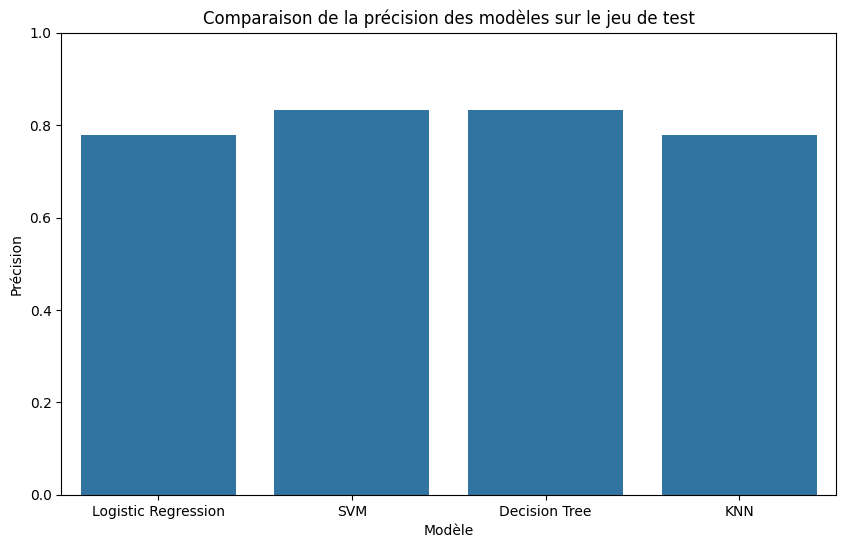

In [58]:
# Exemple de visualisation des précisions de test
test_accuracies = results_df['Test_Accuracy']
plt.figure(figsize=(10, 6))
sns.barplot(x=test_accuracies.index, y=test_accuracies.values)
plt.title('Comparaison de la précision des modèles sur le jeu de test')
plt.ylabel('Précision')
plt.xlabel('Modèle')
plt.ylim(0, 1) # Assurez-vous que l'axe Y va de 0 à 1 (pour la précision)
plt.show()

In [64]:
from sklearn.metrics import classification_report

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_cv.predict(X_test)))

print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_cv.predict(X_test)))

print("\nClassification Report for Tree:")
print(classification_report(y_test, tree_cv.predict(X_test)))

print("\nClassification Report for KNN:")
print(classification_report(y_test, knn_cv.predict(X_test)))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18


Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Classification Report for Tree:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.85      0.92      0.88        12

    accuracy                           0.83        18
   macro avg    

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
